# Fourier analysis of finite differences

Another way to analyze and understand finite differences on regular grids is to apply them to Fourier modes of the form

$$
u(x) = e^{i\xi x},
$$

where $\xi$ is a wavenumber. For this analysis we ignore boundaries and suppose that there is an infinite set of nodes $x_k=kh$, $k\in\mathbb{Z}$. 

Observe that 

$$
\exp[i(\xi+(2\pi/h)) x_k ] &= \exp(i \xi kh)\, \exp(i(2\pi/h)k h) \\ 
&= e^{i\xi x_k} \, [e^{2\pi i}]^k = e^{i\xi x_k}. 
$$

::::{prf:observation} Aliasing
On the grid $x_k=kh$, $k\in \mathbb{Z}$, the Fourier mode at wavenumber $\xi + (2\pi/h)$ is indistinguishable from the mode at wavenumber $\xi$.
::::

Because of aliasing, all behavior on the grid is periodic in the wavenumber with period $2\pi/h$, so we restrict attention to

$$
\xi \in \left. \left[ -\frac{\pi}{h},\frac{\pi}{h} \right. \right). 
$$

## Differentiation factors

If we look at the simplest centered difference formula, we get

$$
\frac{u(h)-u(-h)}{2h} = \frac{ e^{i\xi h} - e^{-i\xi h}}{2h} = \frac{i}{h} \sin(\xi h) =: \frac{i}{h} g_2(\xi h). 
$$

We can call $g_2$ the **differentiation factor**. It should be compared to the exact derivative $u'(0)=i\xi$. Note the series expansion

$$
g_2(\xi h) = \xi - \frac{1}{6}h^2 \xi^3 + O(h^5), 
$$

which is just a restatement of 2nd-order accuracy. However, it is useful to consider the behavior over the full Fourier spectrum. Note that because the differentiation factor depends only on the dimensionless $\xi h$, it's enough to use $h=1$.

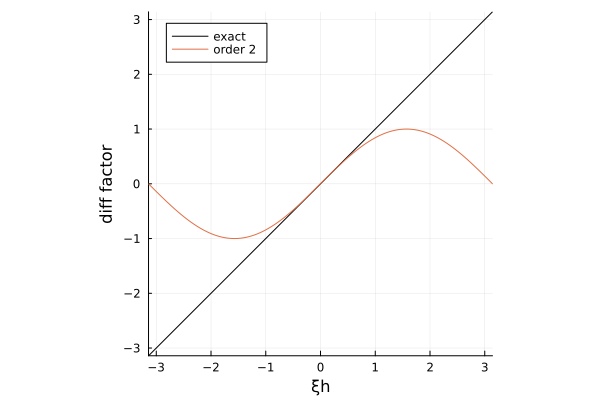

In [1]:
using Plots

g₂(ξ) = sin(ξ)
plot(identity,-π,π,color=:black,label="exact",
    aspect_ratio=1,xaxis=([-π,π],"ξh"),yaxis=([-π,π],"diff factor"),leg=:topleft)
plot!(g₂,-π,π,label="order 2")

For well-resolved wavenumbers with $\xi h \ll 1$, the approximation is good, but the mode at $\xi=\pm \pi/h$ has derivative zero, just like a constant does. This is actually pretty reasonable when you consider that

$$
e^{i(\pi/h)(kh)} = e^{i\pi k} = (-1)^k,
$$

which is a *sawtooth* mode on the nodes. No FD method can "see" any underlying behavior between nodes, so the simplest interpretation is that the function has a local extremum at every node.

By going to higher orders of accuracy, we get greater tangency at the origin, but the high-wavenumber behavior doesn't improve significantly.

In [2]:
using FiniteDifferences,LinearAlgebra

FD4 = FiniteDifferenceMethod(-2:2,1).coefs
g₄(ξ) = imag( dot(FD4,cis.(ξ*(-2:2))) )
plot!(g₄,-π,π,label="order 4")

FD6 = FiniteDifferenceMethod(-3:3,1).coefs
g₆(ξ) = imag( dot(FD6,cis.(ξ*(-3:3))) )
plot!(g₆,-π,π,label="order 6")

LoadError: ArgumentError: Package FiniteDifferences not found in current path.
- Run `import Pkg; Pkg.add("FiniteDifferences")` to install the FiniteDifferences package.

## Non-centered formulas

The story gets more complicated with non-centered formulas. The two-point forward formula has, for example,

$$
\frac{ e^{i\xi h} - 1}{h} := ig_1(\xi),
$$

but here, $g_1$ is complex-valued.

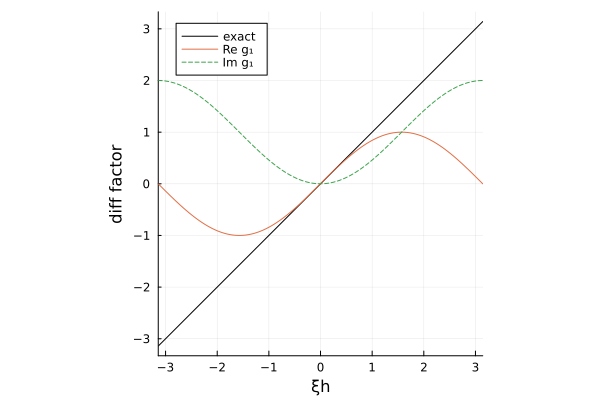

In [3]:
g₁(ξ) = -1im*(cis(ξ)-1)

plot(identity,-π,π,color=:black,label="exact",
    aspect_ratio=1,xaxis=([-π,π],"ξh"),yaxis=("diff factor"),leg=:topleft)
plot!(real∘g₁,-π,π,label="Re g₁")
plot!(imag∘g₁,-π,π,l=:dash,label="Im g₁")

We'll see later that the nonzero imaginary part here has important implications for PDEs.